In [49]:
##importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from dataprep.eda import create_report


In [50]:
df=pd.read_csv("/kaggle/input/banana/banana_quality.csv")
df

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [51]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

**so there is no null value**

In [52]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Size,8000.000000,-0.747802,2.136023,-7.998074,-2.277651,-0.897514,0.654216,7.970800
Weight,8000.000000,-0.761019,2.015934,-8.283002,-2.223574,-0.868659,0.775491,5.679692
Sweetness,8000.000000,-0.770224,1.948455,-6.434022,-2.107329,-1.020673,0.311048,7.539374
Softness,8000.000000,-0.014441,2.065216,-6.959320,-1.590458,0.202644,1.547120,8.241555
HarvestTime,8000.000000,-0.751288,1.996661,-7.570008,-2.120659,-0.934192,0.507326,6.293280
Ripeness,8000.000000,0.781098,2.114289,-7.423155,-0.574226,0.964952,2.261650,7.249034
Acidity,8000.000000,0.008725,2.293467,-8.226977,-1.629450,0.098735,1.682063,7.411633


**So the ranges of columns is good"They have The same Scale",So we do not need to apply any Scallig Techniques**

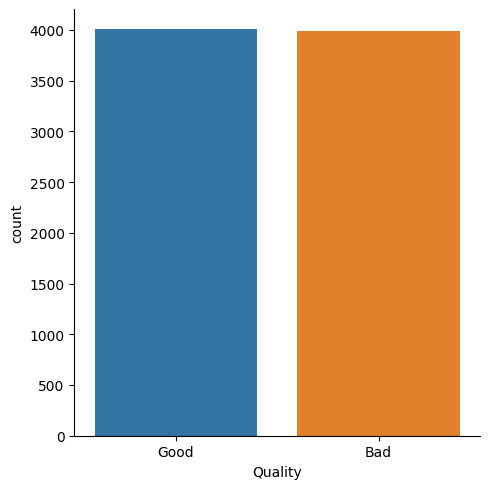

In [53]:
sns.catplot(x="Quality", kind='count', data=df)

# Data Is Balance

In [54]:
#encode traget column
mapping={'Good':1,'Bad':0}
df["Quality"]=df["Quality"].replace(mapping).astype(int)


/tmp/ipykernel_33/8828890.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Quality"]=df["Quality"].replace(mapping).astype(int)


<Axes: >

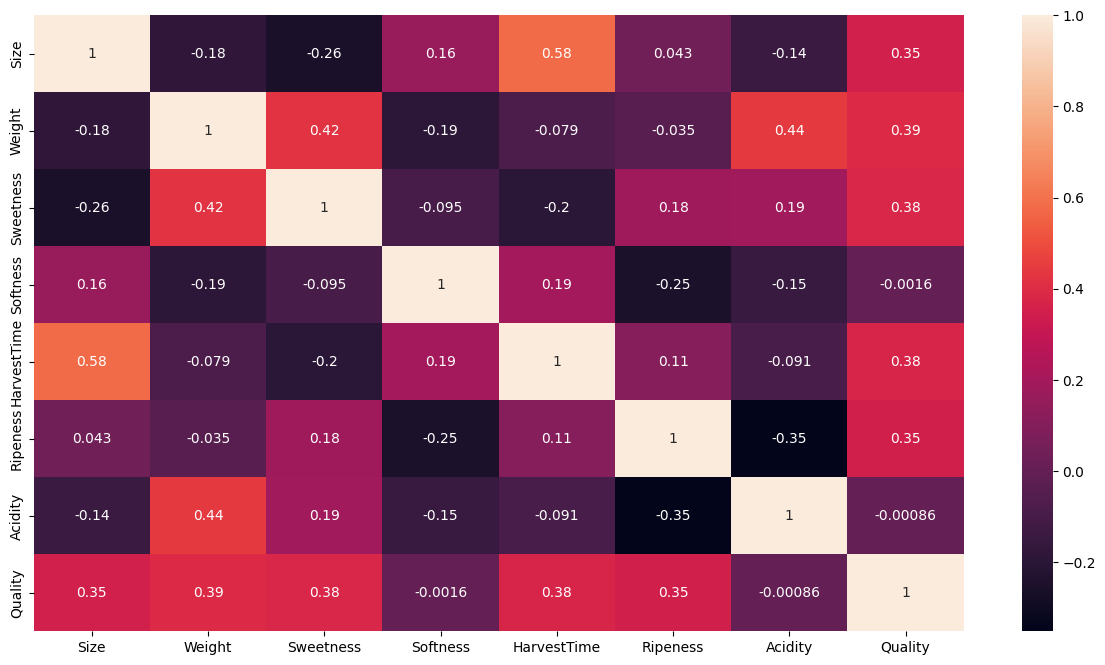

In [55]:
# correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

# Let's Start Machinelearning Models

In [56]:
df

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,0
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,0
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,0
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,0


In [57]:
#Shuffle is important Step to make model learn better and prevent it from bias
df = df.sample(frac=1)
df

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
1747,-0.519749,1.936735,3.539992,-0.620499,-1.939962,1.082008,-0.748697,1
6601,-3.164632,-2.514491,-0.740369,2.073804,-3.765151,-1.247023,0.192015,0
2570,-0.024622,-0.795795,-2.069321,-0.922978,-0.457269,0.950815,-3.862010,0
6269,3.903598,-2.018219,-3.836827,1.674509,-0.749130,-5.472584,-0.597552,0
2060,-2.304900,-0.152850,-1.783019,-1.625808,-0.839706,1.566701,-2.787767,0
...,...,...,...,...,...,...,...,...
4777,1.988625,-2.723843,-1.489007,-1.364723,2.693992,2.187530,-1.496010,1
491,-1.695680,1.245908,0.009467,-3.722636,-0.458231,2.065668,0.947175,1
5315,0.297316,-3.686220,-2.695795,-1.756690,-0.308115,2.857593,-2.759436,1
1027,-0.138677,-0.018388,3.748217,-0.025231,-1.600655,-0.067724,3.811154,1


In [58]:
#Split_Dat
Y=df["Quality"]
X=df.drop(columns="Quality",axis=1)


In [59]:
X

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
1747,-0.519749,1.936735,3.539992,-0.620499,-1.939962,1.082008,-0.748697
6601,-3.164632,-2.514491,-0.740369,2.073804,-3.765151,-1.247023,0.192015
2570,-0.024622,-0.795795,-2.069321,-0.922978,-0.457269,0.950815,-3.862010
6269,3.903598,-2.018219,-3.836827,1.674509,-0.749130,-5.472584,-0.597552
2060,-2.304900,-0.152850,-1.783019,-1.625808,-0.839706,1.566701,-2.787767
...,...,...,...,...,...,...,...
4777,1.988625,-2.723843,-1.489007,-1.364723,2.693992,2.187530,-1.496010
491,-1.695680,1.245908,0.009467,-3.722636,-0.458231,2.065668,0.947175
5315,0.297316,-3.686220,-2.695795,-1.756690,-0.308115,2.857593,-2.759436
1027,-0.138677,-0.018388,3.748217,-0.025231,-1.600655,-0.067724,3.811154


In [60]:
Y

1747    1
6601    0
2570    0
6269    0
2060    0
       ..
4777    1
491     1
5315    1
1027    1
1313    1
Name: Quality, Length: 8000, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
803,-2.954879,0.861396,-1.296062,-1.038507,-1.068392,0.562786,-0.789190
7307,-1.057477,-1.066786,-2.323810,1.029213,-1.886168,-1.851018,2.340041
7463,-1.144030,0.663202,1.276554,0.608649,0.548852,1.293023,2.645249
54,-0.778521,2.661888,2.246521,-0.066941,0.190723,0.211995,5.791185
658,-1.982174,1.683620,-1.846860,-1.666079,-0.795774,2.794209,1.446501
...,...,...,...,...,...,...,...
5337,3.169869,0.183224,-4.034299,1.092901,2.421985,-1.023062,3.599576
3785,-2.790130,-2.244764,-1.794939,-2.901393,-1.032708,1.070385,-0.138766
2712,0.650524,-2.905905,-2.173250,-3.116370,0.115572,3.038979,-0.392357
387,-1.023948,1.828812,2.464223,-2.055078,-1.149651,1.468438,1.247888


In [67]:
# Define the model with desired parameters
clf = SVC(kernel='rbf')  # Choose kernel (e.g., linear, rbf)
# Train the model on the training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVM:", accuracy*100)

Accuracy SVM: 98.2


# The result is excellent for SVM

# #Let's try DeepLearning

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,BatchNormalization,Dense,Activation
model=Sequential()
#Input Layer
model.add(Dense(units=7,activation='relu'))
#HIDDEN
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
# Outpput layer

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7721 - loss: 0.4720 - val_accuracy: 0.8860 - val_loss: 0.3646
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9126 - loss: 0.2332 - val_accuracy: 0.9235 - val_loss: 0.1919
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9353 - loss: 0.1708 - val_accuracy: 0.9380 - val_loss: 0.1522
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9468 - loss: 0.1491 - val_accuracy: 0.9460 - val_loss: 0.1396
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9597 - loss: 0.1159 - val_accuracy: 0.9535 - val_loss: 0.1263
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9584 - loss: 0.1164 - val_accuracy: 0.9580 - val_loss: 0.1175
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9616 - loss: 0.1124 - val_accuracy: 0.9615 - val_loss: 0.1061
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9697 - loss: 0.0937 - val_accuracy: 0.